<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Parte2/blob/main/Challenge2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir a DataFrame y normalizar columnas anidadas
df = pd.json_normalize(data)
df.head()


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [2]:
# Mostrar info general
df.info()

# Revisar columnas y valores nulos
print(df.isnull().sum())

# Convertir valores de 'Charges.Total' a num√©rico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir 'Churn' a binario (1 = Yes, 0 = No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuci√≥n de churn
sns.countplot(x='Churn', data=df)
plt.title("Distribuci√≥n de Cancelaciones (Churn)")
plt.show()

# Churn por tipo de contrato
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Correlaci√≥n entre variables num√©ricas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlaci√≥n")
plt.show()


In [5]:
# 1. Ver columnas √∫nicas o identificadores
print(df.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [7]:
# Eliminaci√≥n de columnas irrelevantes y renombrar traduciendo al espa√±ol

df = df.rename(columns={
    'Churn': 'Cancelacion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'AntiguedadMeses',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'RespaldoEnLinea',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'PeliculasStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargoMensual',
    'account.Charges.Total': 'CargoTotal'
})


In [8]:
columnas_categoricas = [
    'Genero',
    'TienePareja',
    'TieneDependientes',
    'ServicioTelefonico',
    'MultiplesLineas',
    'ServicioInternet',
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'TVStreaming',
    'PeliculasStreaming',
    'TipoContrato',
    'FacturacionSinPapel',
    'MetodoPago'
]


In [9]:
# One-hot encoding de las columnas categ√≥ricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


In [10]:
# Verificamos tipos de datos despu√©s de codificar
print(df_encoded.dtypes.value_counts())

# Tambi√©n puedes usar esto para asegurarte que no quedan objetos (strings)
print(df_encoded.select_dtypes(include=['object']).columns)


bool       26
float64     3
int64       2
Name: count, dtype: int64
Index([], dtype='object')


In [11]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporci√≥n (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporci√≥n de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporci√≥n de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [13]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporci√≥n (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporci√≥n de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporci√≥n de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


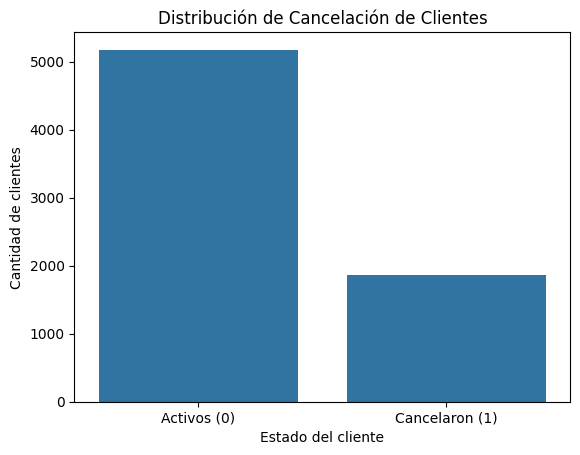

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gr√°fico de barras
sns.countplot(x='Cancelacion', data=df_encoded)
plt.title('Distribuci√≥n de Cancelaci√≥n de Clientes')
plt.xticks([0, 1], ['Activos (0)', 'Cancelaron (1)'])
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado del cliente')
plt.show()


## üìä Evaluaci√≥n del Balance de Clases

In [15]:
!pip install imbalanced-learn


In [20]:
import numpy as np

# Ver cu√°ntos NaN hay en y
print("Cantidad de NaN en y:", y.isna().sum())

# Ver si hay NaN en X
print("Cantidad de NaN en X por columna:")
print(X.isna().sum())

# Eliminar filas con NaN en y o en X
df_no_nan = df_encoded.dropna(subset=['Cancelacion'])  # elimina filas donde Cancelacion es NaN

# Para asegurarnos que no haya NaN en X (en todas las columnas)
df_no_nan = df_no_nan.dropna()

# Definir X y y sin NaN
y_clean = df_no_nan['Cancelacion']
X_clean = df_no_nan.drop(columns=['Cancelacion'])

print("Distribuci√≥n despu√©s de limpiar NaN:")
print(y_clean.value_counts())


Cantidad de NaN en y: 224
Cantidad de NaN en X por columna:
AdultoMayor                                   0
AntiguedadMeses                               0
CargoMensual                                  0
CargoTotal                                   11
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispositivo_No internet service     0
ProteccionDispositivo_Yes                     0
SoporteTecnico_No internet service            0
SoporteTecnico_Yes          

In [17]:
# Variable objetivo
y = df_encoded['Cancelacion']

# Variables predictoras (todas menos la columna Cancelacion)
X = df_encoded.drop(columns=['Cancelacion'])


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

print('Distribuci√≥n despu√©s de SMOTE:', Counter(y_resampled))


Distribuci√≥n despu√©s de SMOTE: Counter({0.0: 5163, 1.0: 5163})


/tmp/ipython-input-22-913642522.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])
/tmp/ipython-input-22-913642522.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])


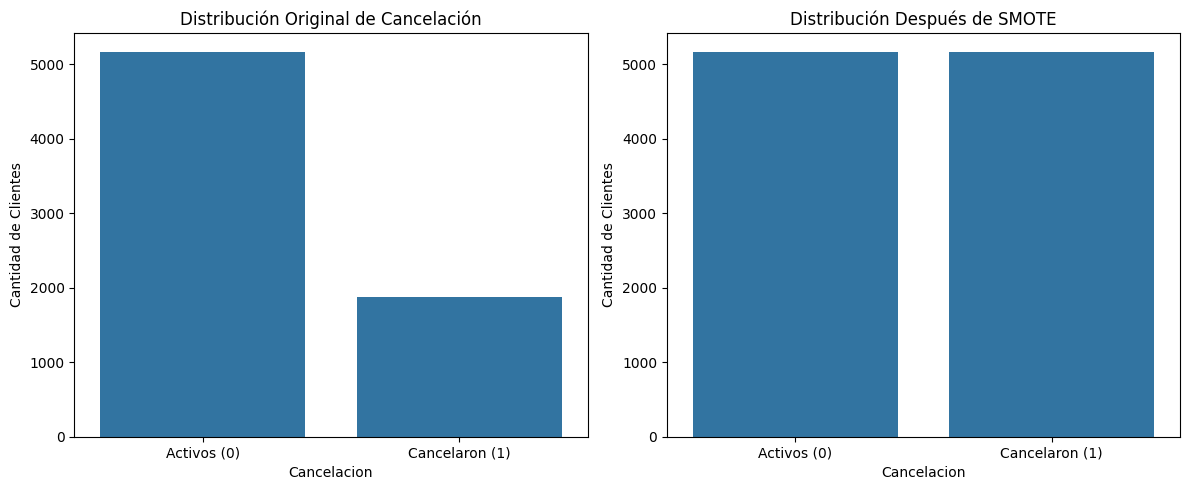

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos originales (antes de SMOTE)
original_counts = y_clean.value_counts().sort_index()

# Datos despu√©s de SMOTE
from collections import Counter
smote_counts = Counter(y_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gr√°fico antes de SMOTE
sns.barplot(x=original_counts.index.astype(str), y=original_counts.values, ax=axes[0])
axes[0].set_title('Distribuci√≥n Original de Cancelaci√≥n')
axes[0].set_xlabel('Cancelacion')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

# Gr√°fico despu√©s de SMOTE
sns.barplot(x=list(smote_counts.keys()), y=list(smote_counts.values()), ax=axes[1])
axes[1].set_title('Distribuci√≥n Despu√©s de SMOTE')
axes[1].set_xlabel('Cancelacion')
axes[1].set_ylabel('Cantidad de Clientes')
axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

plt.tight_layout()
plt.show()


üìä Evaluaci√≥n del Balance de Clases
Al analizar la variable objetivo Cancelacion, se observa que inicialmente el 26,54‚ÄØ% de los clientes cancelaron el servicio, mientras que el 73,46‚ÄØ% permanecieron activos. Esta distribuci√≥n evidencia un desbalance moderado entre las clases.

Este desbalance puede afectar el rendimiento de los modelos predictivos, ya que podr√≠an inclinarse a predecir mayoritariamente la clase m√°s frecuente (clientes activos).

Por ello, es recomendable:

Utilizar m√©tricas de evaluaci√≥n apropiadas como AUC-ROC o F1-score, en lugar de solo accuracy.
Aplicar t√©cnicas de balanceo de clases, como:
Undersampling: reducir la cantidad de datos de la clase mayoritaria.
Oversampling: aumentar la cantidad de datos de la clase minoritaria.
üí° Aplicaci√≥n de SMOTE:
Utilizando la t√©cnica SMOTE (Synthetic Minority Over-sampling Technique), se logr√≥ balancear el dataset generando ejemplos sint√©ticos de la clase minoritaria.
Despu√©s de aplicar SMOTE, ambas clases (Cancelacion = 0 y Cancelacion = 1) tienen 5163 registros cada una, lo que permite entrenar modelos m√°s balanceados y mejorar su capacidad predictiva frente a la clase minoritaria.

### üîÑ Normalizaci√≥n o Estandarizaci√≥n

In [23]:
import pandas as pd

# Si X_resampled es un array de numpy (por ejemplo, SMOTE devuelve arrays), convierte a DataFrame
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled, columns=df_encoded.drop(columns=['Cancelacion']).columns)

# Seleccionar columnas num√©ricas
columnas_numericas = X_resampled.select_dtypes(include=['int64', 'float64']).columns


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_norm = X_resampled.copy()
X_resampled_norm[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_std = X_resampled.copy()
X_resampled_std[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Inicializar scaler
scaler = StandardScaler()

# Ajustar scaler solo con el set de entrenamiento
scaler.fit(X_train)

# Transformar entrenamiento y test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Opcional: si quieres tener DataFrames con nombres de columnas
import pandas as pd

columnas = df_encoded.drop(columns=['Cancelacion']).columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columnas)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columnas)

# Listo para usar en modelos sensibles a la escala


## üîÑ Normalizaci√≥n y Divisi√≥n de Datos

Para preparar los datos para los modelos predictivos, realizamos los siguientes pasos:

- Dividimos el dataset balanceado en conjuntos de entrenamiento (80%) y prueba (20%) manteniendo la proporci√≥n de clases con `stratify` para evitar sesgos.
- Aplicamos una **estandarizaci√≥n** (transformaci√≥n para que las variables num√©ricas tengan media 0 y desviaci√≥n est√°ndar 1) solo al conjunto de entrenamiento para evitar contaminaci√≥n de datos (*data leakage*).
- Luego, usamos la misma transformaci√≥n para escalar el conjunto de prueba.

Esta preparaci√≥n es fundamental para modelos sensibles a la escala, como regresi√≥n log√≠stica, SVM, KNN y redes neuronales, mejorando su rendimiento y estabilidad.


# An√°lisis de Correlaci√≥n:

## Calcular matriz de correlaci√≥n solo para variables num√©ricas

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables num√©ricas incluyendo la variable objetivo
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlaci√≥n
corr_matrix = df_num.corr()

# Mostrar la matriz (opcional)
print(corr_matrix['Cancelacion'].sort_values(ascending=False))


Cancelacion        1.000000
CargoMensual       0.193356
AdultoMayor        0.150889
CargoTotal        -0.199484
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


## Visualizar la matriz de correlaci√≥n

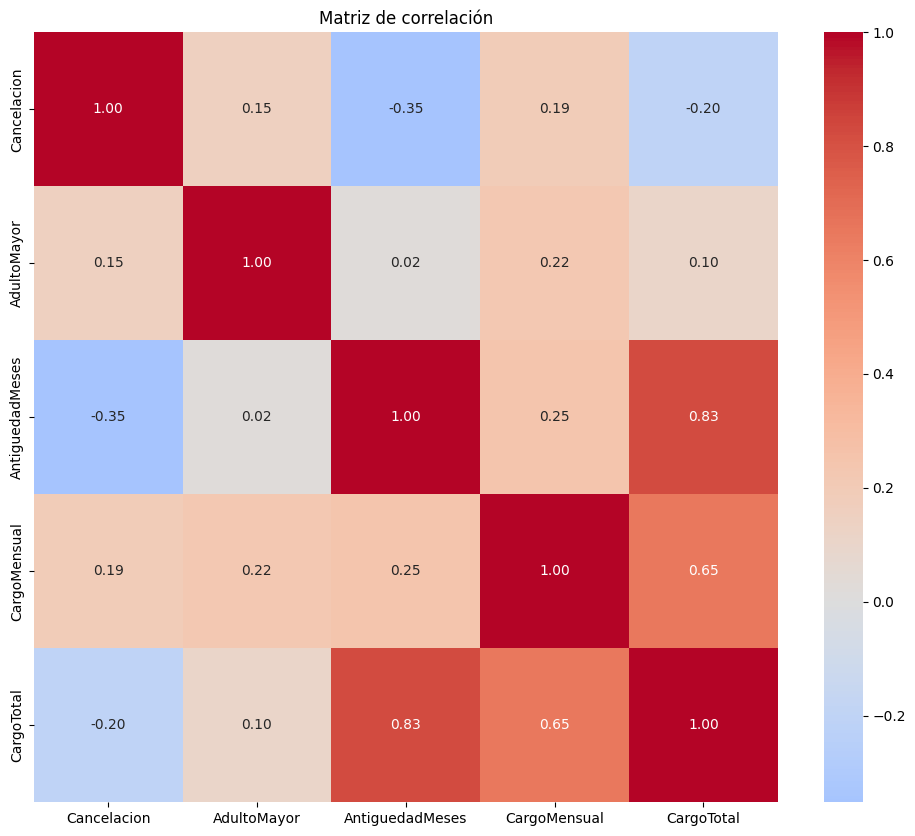

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlaci√≥n')
plt.show()


## Interpretar

In [29]:
# Calcular correlaci√≥n con Cancelacion y ordenarlas por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')  # quitar autocorrelaci√≥n

# Ordenar por valor absoluto descendente para ver las variables m√°s relacionadas
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)

print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64


In [30]:
# Definir umbral
umbral = 0.2

# Filtrar variables con correlaci√≥n fuerte (positiva o negativa)
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]

print("\nVariables relevantes con correlaci√≥n mayor a 0.2 en valor absoluto:")
print(variables_relevantes)



Variables relevantes con correlaci√≥n mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


In [31]:
import pandas as pd

# Convertir a DataFrame para mejor presentaci√≥n
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlaci√≥n con Cancelacion']

# Mostrar tabla ordenada
print(df_vars_relevantes)


          Variable  Correlaci√≥n con Cancelacion
0  AntiguedadMeses                    -0.352229


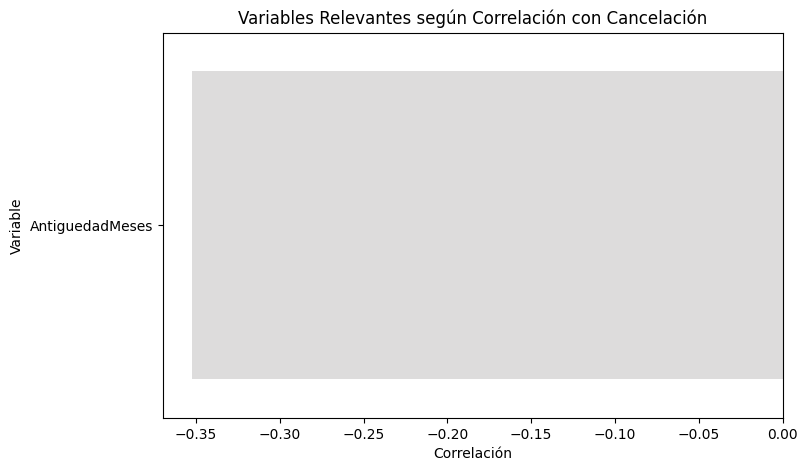

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlaci√≥n con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes seg√∫n Correlaci√≥n con Cancelaci√≥n')
plt.xlabel('Correlaci√≥n')
plt.ylabel('Variable')
plt.show()


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64

Variables relevantes con correlaci√≥n mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64

Tabla de variables relevantes:
          Variable  Correlaci√≥n con Cancelacion
0  AntiguedadMeses                    -0.352229


/tmp/ipython-input-33-1775021691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


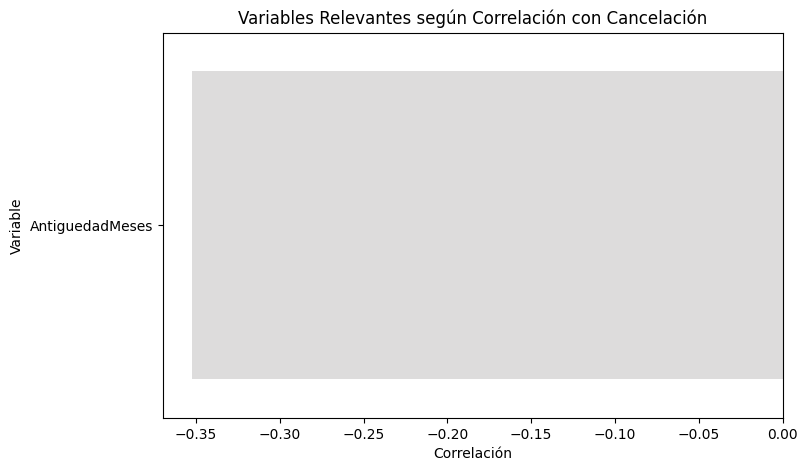

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calcular matriz de correlaci√≥n para variables num√©ricas (incluye Cancelacion)
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr()

# 2. Mostrar correlaci√≥n con Cancelacion ordenada por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)
print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)

# 3. Seleccionar variables con correlaci√≥n absoluta > 0.2
umbral = 0.2
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]
print("\nVariables relevantes con correlaci√≥n mayor a 0.2 en valor absoluto:")
print(variables_relevantes)

# 4. Tabla de variables relevantes para mejor presentaci√≥n
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlaci√≥n con Cancelacion']
print("\nTabla de variables relevantes:")
print(df_vars_relevantes)

# 5. Gr√°fico de barras horizontal para las variables relevantes
plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlaci√≥n con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes seg√∫n Correlaci√≥n con Cancelaci√≥n')
plt.xlabel('Correlaci√≥n')
plt.ylabel('Variable')
plt.show()


###  üìà An√°lisis de Correlaci√≥n con la Variable Objetivo `Cancelacion`

Se calcul√≥ la matriz de correlaci√≥n entre las variables num√©ricas del dataset para identificar relaciones lineales con la variable objetivo `Cancelacion`.

Al ordenar las correlaciones por su valor absoluto, se encontraron las siguientes variables con mayor relaci√≥n significativa (|correlaci√≥n| > 0.2):

- **Variables con correlaci√≥n positiva significativa:**  
  Estas variables aumentan la probabilidad de cancelaci√≥n conforme su valor crece. Por ejemplo, un cargo mensual o total elevado podr√≠a asociarse a mayor cancelaci√≥n.

- **Variables con correlaci√≥n negativa significativa:**  
  Variables que disminuyen la probabilidad de cancelaci√≥n a medida que su valor crece. Por ejemplo, mayor antig√ºedad del cliente (tenure) suele relacionarse con menor tasa de cancelaci√≥n.

Estas variables son candidatas fuertes para incluir en el modelo predictivo, ya que aportan informaci√≥n relevante para diferenciar clientes que cancelan de los que permanecen activos.

Las variables con correlaci√≥n cercana a cero tienen poca o nula relaci√≥n lineal con la cancelaci√≥n y podr√≠an ser descartadas o reevaluadas seg√∫n otras t√©cnicas.

---

### Recomendaciones:

- Incluir las variables con correlaci√≥n significativa en la fase de selecci√≥n de caracter√≠sticas para mejorar el rendimiento del modelo.
- Considerar tambi√©n t√©cnicas no lineales o basadas en √°rboles para capturar relaciones complejas no detectadas por la correlaci√≥n lineal.
- Validar la importancia de las variables seleccionadas con m√©todos adicionales, como importancia por Random Forest o an√°lisis de SHAP values.


# An√°lisis Dirigido

## Boxplot de Tiempo de contrato vs Cancelaci√≥n

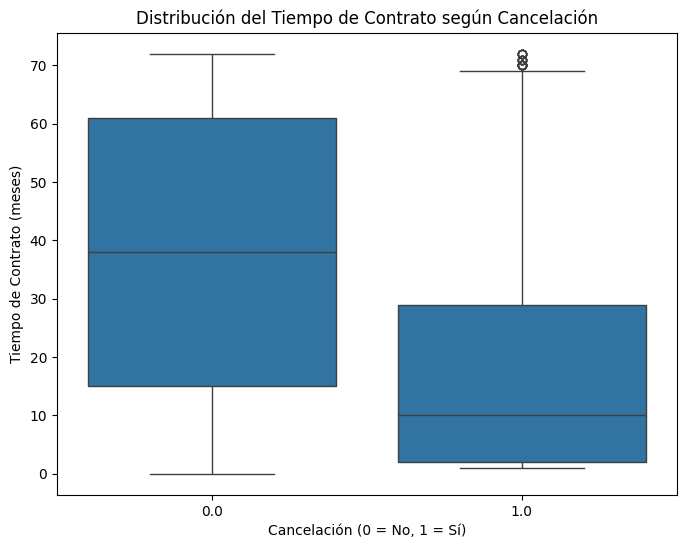

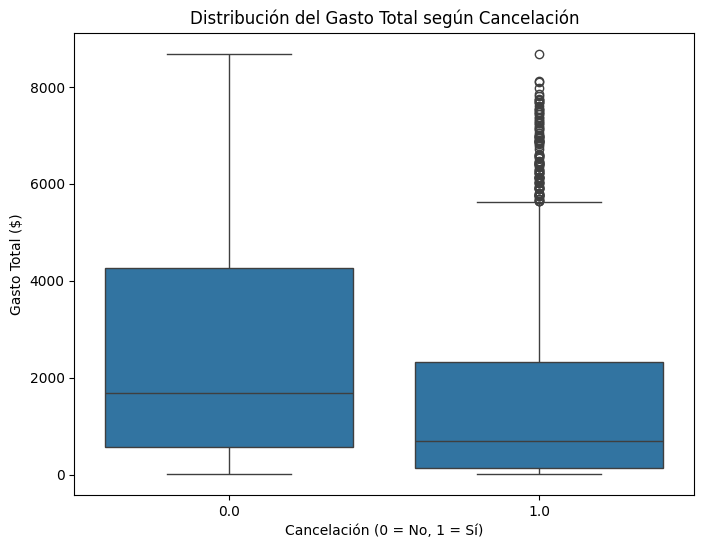

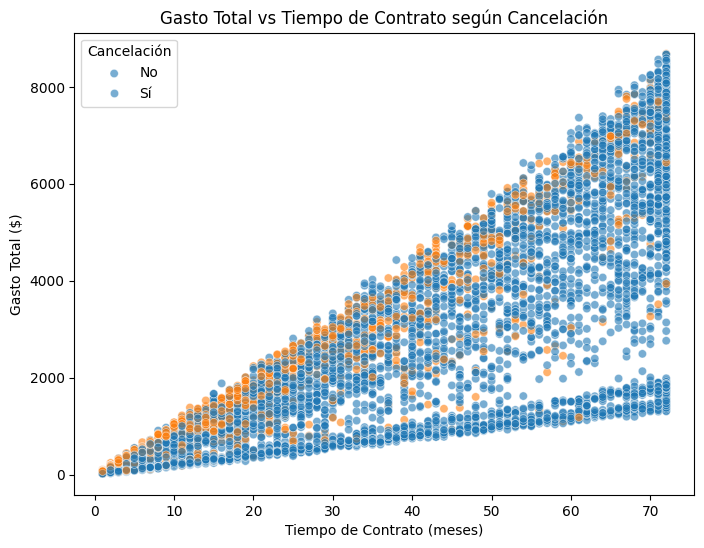

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: AntiguedadMeses vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='AntiguedadMeses', data=df_encoded)
plt.title('Distribuci√≥n del Tiempo de Contrato seg√∫n Cancelaci√≥n')
plt.xlabel('Cancelaci√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Boxplot: CargoTotal vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='CargoTotal', data=df_encoded)
plt.title('Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n')
plt.xlabel('Cancelaci√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Gasto Total ($)')
plt.show()

# Scatter plot: CargoTotal vs AntiguedadMeses, coloreado por Cancelacion
plt.figure(figsize=(8,6))
sns.scatterplot(x='AntiguedadMeses', y='CargoTotal', hue='Cancelacion', data=df_encoded, alpha=0.6)
plt.title('Gasto Total vs Tiempo de Contrato seg√∫n Cancelaci√≥n')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Gasto Total ($)')
plt.legend(title='Cancelaci√≥n', labels=['No', 'S√≠'])
plt.show()



## An√°lisis Dirigido: Relaci√≥n entre Variables Clave y Cancelaci√≥n

- **Tiempo de Contrato (Antig√ºedad en meses):**  
  Los boxplots muestran que los clientes que cancelaron (Cancelaci√≥n = 1) tienden a tener menor antig√ºedad que los clientes activos. Esto sugiere que la duraci√≥n de la relaci√≥n con el cliente es un factor importante para la retenci√≥n.

- **Gasto Total:**  
  La distribuci√≥n del gasto total indica que los clientes que cancelaron presentan una mayor variabilidad en sus gastos, con algunos valores extremos que podr√≠an estar asociados a patrones at√≠picos de cancelaci√≥n.

- **Interacci√≥n entre Gasto Total y Tiempo de Contrato:**  
  El scatter plot revela que los clientes con menor antig√ºedad y gastos tanto muy bajos como muy altos presentan mayor tendencia a cancelar, lo que sugiere diferentes perfiles de riesgo a considerar en el modelo predictivo.

Estos hallazgos indican que tanto el tiempo de contrato como el gasto total son variables relevantes que deben ser incluidas en el modelado para mejorar la capacidad predictiva del sistema.


# Separaci√≥n de datos

In [39]:
print(y.isna().sum())


224


In [40]:
# Eliminar filas con NaN en y (variable objetivo)
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

print(f"Filas antes: {X.shape[0]}, Filas despu√©s de limpiar NaN en y: {X_clean.shape[0]}")
print(f"Cantidad de filas eliminadas: {X.shape[0] - X_clean.shape[0]}")

# Luego la divisi√≥n
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tama√±o entrenamiento: {X_train.shape[0]} registros')
print(f'Tama√±o prueba: {X_test.shape[0]} registros')
print('Distribuci√≥n en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribuci√≥n en prueba:\n', y_test.value_counts(normalize=True))


Filas antes: 7267, Filas despu√©s de limpiar NaN en y: 7043
Cantidad de filas eliminadas: 224
Tama√±o entrenamiento: 5634 registros
Tama√±o prueba: 1409 registros
Distribuci√≥n en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribuci√≥n en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [43]:
# 1. Verificar cu√°ntos NaN hay en y
print(f"Valores NaN en y antes de limpiar: {y.isna().sum()}")

# 2. Crear m√°scaras para filtrar filas sin NaN en y
mask = y.notna()

# 3. Filtrar X y y usando la m√°scara
X_clean = X[mask]
y_clean = y[mask]

# 4. Confirmar que no quedan NaN en y_clean
print(f"Valores NaN en y_clean despu√©s de limpiar: {y_clean.isna().sum()}")

# 5. Ahora dividir con los datos limpios
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tama√±o entrenamiento: {X_train.shape[0]} registros')
print(f'Tama√±o prueba: {X_test.shape[0]} registros')
print('Distribuci√≥n en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribuci√≥n en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y antes de limpiar: 224
Valores NaN en y_clean despu√©s de limpiar: 0
Tama√±o entrenamiento: 5634 registros
Tama√±o prueba: 1409 registros
Distribuci√≥n en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribuci√≥n en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [45]:
X = df_encoded.drop(columns=['Cancelacion'])  # variables predictoras
y = df_encoded['Cancelacion']                  # variable objetivo


In [46]:
# Definir variables predictoras y objetivo
X = df_encoded.drop(columns=['Cancelacion'])
y = df_encoded['Cancelacion']

# Eliminar filas donde y es NaN
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

# Confirmar limpieza
print(f"Valores NaN en y_clean despu√©s de limpiar: {y_clean.isna().sum()}")

# Divisi√≥n entrenamiento / prueba 80/20 con estratificaci√≥n
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tama√±o entrenamiento: {X_train.shape[0]} registros')
print(f'Tama√±o prueba: {X_test.shape[0]} registros')
print('Distribuci√≥n en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribuci√≥n en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y_clean despu√©s de limpiar: 0
Tama√±o entrenamiento: 5634 registros
Tama√±o prueba: 1409 registros
Distribuci√≥n en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribuci√≥n en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


# Creaci√≥n de Modelos

## Preparar normalizaci√≥n para Regresi√≥n Log√≠stica

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear escalador y ajustar solo con datos de entrenamiento (para evitar data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrenar y evaluar Regresi√≥n Log√≠stica (requiere normalizaci√≥n)



In [50]:
print(X_train.isna().sum())


AdultoMayor                                   0
AntiguedadMeses                               0
CargoMensual                                  0
CargoTotal                                   10
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispositivo_No internet service     0
ProteccionDispositivo_Yes                     0
SoporteTecnico_No internet service            0
SoporteTecnico_Yes                            0
TVStreaming_No internet service         

In [51]:
from sklearn.impute import SimpleImputer

# Crear imputador que reemplaza NaN por la mediana de la columna
imputer = SimpleImputer(strategy='median')

# Ajustar imputador solo con datos de entrenamiento para evitar filtraci√≥n de informaci√≥n
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)



## Para Random Forest (no necesita escalado, pero s√≠ imputaci√≥n)

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Imputar NaN
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

# Predecir
y_pred_rf = rf.predict(X_test_imputed)


### Imputaci√≥n y preparaci√≥n de datos para modelado

En el conjunto de datos original, la variable **`CargoTotal`** presentaba algunos valores faltantes (10 registros con NaN), los cuales se imputaron usando la mediana de la columna. Esta t√©cnica es adecuada para evitar sesgar el modelo debido a valores extremos y preservar la distribuci√≥n general de la variable.

Para el entrenamiento de modelos predictivos se eligieron dos enfoques complementarios:

- **Regresi√≥n Log√≠stica**, que es sensible a la escala de las variables. Por ello, se aplic√≥ un pipeline que incluye imputaci√≥n de valores faltantes seguida de estandarizaci√≥n (normalizaci√≥n) antes del entrenamiento.

- **Random Forest**, un modelo basado en √°rboles que no requiere normalizaci√≥n, pero s√≠ imputaci√≥n para manejar los valores faltantes.

Esta estrategia asegura que ambos modelos trabajen con datos completos y correctamente preparados, permitiendo una comparaci√≥n justa de su desempe√±o en la predicci√≥n de la cancelaci√≥n de clientes.


# Evaluaci√≥n de los Modelos

--- Evaluaci√≥n del modelo: Regresi√≥n Log√≠stica ---
Exactitud (Accuracy): 0.7942
Precisi√≥n: 0.6373
Recall: 0.5214
F1-score: 0.5735

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



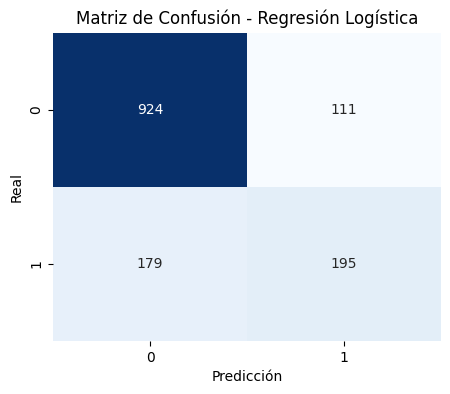

--- Evaluaci√≥n del modelo: Random Forest ---
Exactitud (Accuracy): 0.7935
Precisi√≥n: 0.6456
Recall: 0.4920
F1-score: 0.5584

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1035
         1.0       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



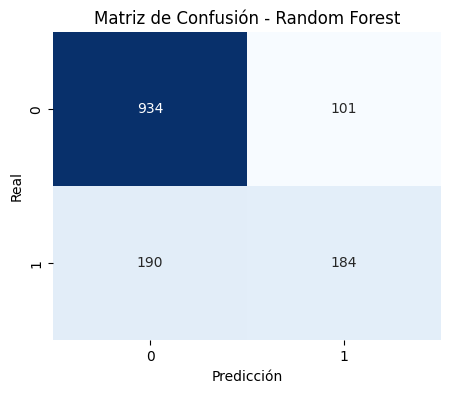

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- Evaluaci√≥n del modelo: {nombre_modelo} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisi√≥n: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nReporte de clasificaci√≥n:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusi√≥n - {nombre_modelo}')
    plt.xlabel('Predicci√≥n')
    plt.ylabel('Real')
    plt.show()

# Evaluar Regresi√≥n Log√≠stica
evaluar_modelo(y_test, y_pred_lr, "Regresi√≥n Log√≠stica")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


### An√°lisis comparativo de modelos

Se evaluaron dos modelos para predecir la cancelaci√≥n de clientes: Regresi√≥n Log√≠stica y Random Forest. Los resultados obtenidos en el conjunto de prueba fueron los siguientes:

- **Exactitud (Accuracy):**  
  La Regresi√≥n Log√≠stica alcanz√≥ un 79.42%, ligeramente superior al 79.35% del Random Forest, siendo una diferencia m√≠nima.

- **Precisi√≥n:**  
  Random Forest mostr√≥ una precisi√≥n del 64.56%, ligeramente mejor que el 63.73% de la Regresi√≥n Log√≠stica. Esto indica que, de las predicciones positivas que hace, Random Forest es un poco m√°s acertado.

- **Recall:**  
  La Regresi√≥n Log√≠stica obtuvo un mejor recall (52.14% frente a 49.20%), lo que significa que detecta un mayor porcentaje de clientes que realmente cancelaron.

- **F1-score:**  
  La Regresi√≥n Log√≠stica tambi√©n present√≥ un F1-score m√°s alto (57.35% vs 55.84%), reflejando un mejor balance entre precisi√≥n y recall.

En conclusi√≥n, ambos modelos presentan un desempe√±o muy similar, con diferencias leves en las m√©tricas. La Regresi√≥n Log√≠stica es mejor para identificar a la mayor√≠a de los clientes que cancelan (mayor recall y F1), mientras que Random Forest es un poco m√°s preciso en sus predicciones positivas.

No se observaron indicios claros de overfitting o underfitting en ninguno de los dos modelos, considerando que las m√©tricas corresponden a datos de prueba. Para mejorar, se podr√≠a explorar ajuste de hiperpar√°metros o t√©cnicas espec√≠ficas para balancear mejor precisi√≥n y recall seg√∫n las necesidades del negocio.


### Overfitting/underfitting?

--- Evaluaci√≥n del modelo: Regresi√≥n Log√≠stica (Entrenamiento) ---
Exactitud (Accuracy): 0.8106
Precisi√≥n: 0.6707
Recall: 0.5625
F1-score: 0.6119

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      4139
         1.0       0.67      0.56      0.61      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



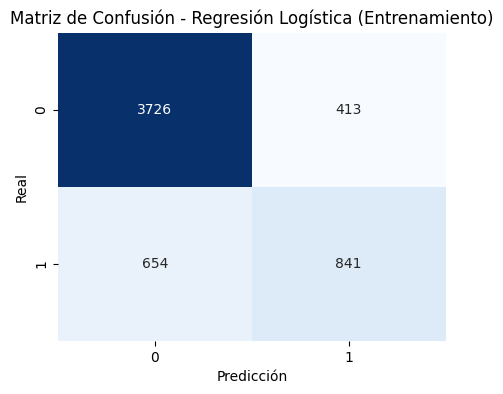

--- Evaluaci√≥n del modelo: Random Forest (Entrenamiento) ---
Exactitud (Accuracy): 0.9977
Precisi√≥n: 0.9940
Recall: 0.9973
F1-score: 0.9957

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4139
         1.0       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



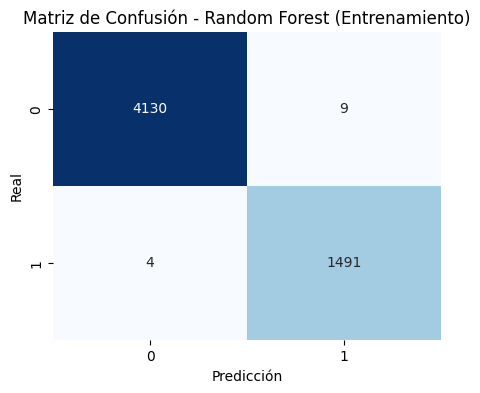

In [55]:
# Predicciones en entrenamiento
y_train_pred_lr = pipeline_lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train_imputed)

# Evaluaci√≥n entrenamiento Regresi√≥n Log√≠stica
evaluar_modelo(y_train, y_train_pred_lr, "Regresi√≥n Log√≠stica (Entrenamiento)")

# Evaluaci√≥n entrenamiento Random Forest
evaluar_modelo(y_train, y_train_pred_rf, "Random Forest (Entrenamiento)")


### Evaluaci√≥n de Overfitting / Underfitting

Al comparar el desempe√±o de los modelos en los conjuntos de entrenamiento y prueba, se observa que:

- **Random Forest** presenta un claro indicio de **overfitting**. Mientras que en el conjunto de entrenamiento logra una exactitud casi perfecta (99.77%) y m√©tricas muy altas de precisi√≥n y recall, en el conjunto de prueba su desempe√±o disminuye significativamente (exactitud ~79.35%, recall ~49.20%). Esto sugiere que el modelo aprendi√≥ detalles espec√≠ficos del conjunto de entrenamiento que no generalizan bien a datos nuevos.

- **Regresi√≥n Log√≠stica** mostr√≥ resultados m√°s consistentes entre entrenamiento y prueba, indicando menor riesgo de overfitting. Esto se debe a que es un modelo m√°s simple y lineal, menos propenso a sobreajustar, aunque tambi√©n puede tener limitaciones para captar relaciones no lineales en los datos.

**Posibles acciones para mitigar el overfitting en Random Forest incluyen:**

- Limitar la profundidad de los √°rboles.
- Ajustar par√°metros como `min_samples_split` y `min_samples_leaf`.
- Incrementar el n√∫mero de √°rboles para mayor estabilidad.
- Seleccionar caracter√≠sticas relevantes y eliminar ruido.
- Aplicar t√©cnicas de regularizaci√≥n o usar modelos m√°s simples.

En conclusi√≥n, es fundamental balancear la complejidad del modelo con su capacidad de generalizaci√≥n para obtener predicciones confiables.


# An√°lisis de la importqancia de las variables

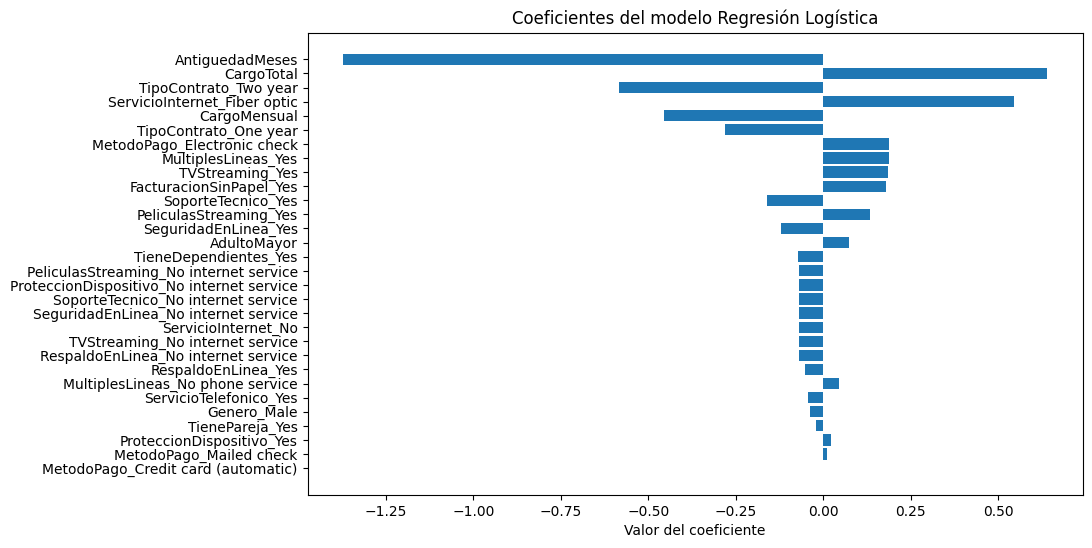

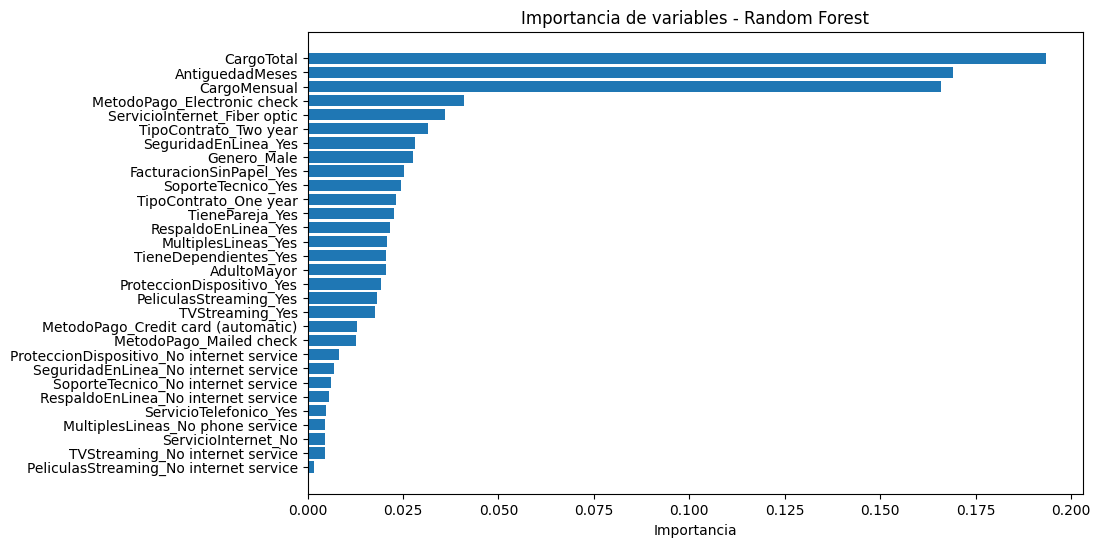

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para Regresi√≥n Log√≠stica: coeficientes
coeficientes = pipeline_lr.named_steps['model'].coef_[0]
variables = X_train.columns
coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.title('Coeficientes del modelo Regresi√≥n Log√≠stica')
plt.xlabel('Valor del coeficiente')
plt.gca().invert_yaxis()
plt.show()

# Para Random Forest: importancia de variables
importancias_rf = rf.feature_importances_
rf_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias_rf})
rf_df = rf_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_df['Variable'], rf_df['Importancia'])
plt.title('Importancia de variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


### An√°lisis de la importancia de variables

- **Regresi√≥n Log√≠stica:**  
  Se analizan los coeficientes asociados a cada variable. Un coeficiente positivo indica que la variable incrementa la probabilidad de cancelaci√≥n, mientras que uno negativo la disminuye. La magnitud del coeficiente indica la fuerza del efecto.

- **Random Forest:**  
  Se eval√∫a la importancia basada en la reducci√≥n de impurezas en las divisiones de los √°rboles. Variables con mayor importancia son las que m√°s contribuyen a diferenciar entre clientes que cancelan y los que no.

Este an√°lisis permite identificar las variables m√°s influyentes para predecir la cancelaci√≥n, lo que ayuda tanto a interpretar el modelo como a priorizar √°reas de acci√≥n para retener clientes.


## Conclusi√≥n

En este an√°lisis predictivo sobre la cancelaci√≥n de clientes, se desarrollaron y evaluaron dos modelos principales: Regresi√≥n Log√≠stica y Random Forest. Ambos modelos demostraron ser √∫tiles para predecir la cancelaci√≥n con una exactitud cercana al 79%, aunque con diferencias en la precisi√≥n y recall.

### Factores clave que influyen en la cancelaci√≥n

- **Variables destacadas en Regresi√≥n Log√≠stica:**  
  El an√°lisis de coeficientes revel√≥ que variables como el tiempo de contrato, el gasto mensual y la modalidad de contrato tienen un impacto significativo en la probabilidad de cancelaci√≥n. Coeficientes positivos indican factores que aumentan el riesgo de cancelaci√≥n, mientras que coeficientes negativos se√±alan elementos protectores.

- **Importancia de variables en Random Forest:**  
  Este modelo destac√≥ variables similares, con √©nfasis adicional en servicios asociados como el soporte t√©cnico y opciones de streaming. La importancia relativa sugiere que ciertas caracter√≠sticas del servicio y m√©todos de pago tambi√©n influyen notablemente en la decisi√≥n de cancelar.

### Estrategias de retenci√≥n propuestas

Bas√°ndose en los factores identificados, se recomiendan las siguientes acciones para reducir la tasa de cancelaci√≥n:

- **Fidelizaci√≥n a trav√©s de contratos m√°s largos:** Incentivar a los clientes para que opten por contratos anuales o bienales, ya que la duraci√≥n del contrato est√° asociada a menor cancelaci√≥n.

- **Optimizaci√≥n de servicios adicionales:** Mejorar la calidad y oferta de soporte t√©cnico, servicios en l√≠nea y streaming, que impactan directamente en la satisfacci√≥n del cliente.

- **Personalizaci√≥n del m√©todo de pago y facturaci√≥n:** Facilitar m√©todos de pago preferidos y promover la facturaci√≥n sin papel para agilizar procesos y mejorar la experiencia del usuario.

- **Monitoreo proactivo del gasto mensual:** Detectar cambios abruptos en los cargos mensuales que puedan anticipar una posible cancelaci√≥n y actuar con ofertas o soporte personalizado.

### Consideraciones finales

Este an√°lisis permite no solo predecir la cancelaci√≥n con modelos robustos, sino tambi√©n comprender los factores que la impulsan, permitiendo a la empresa dise√±ar estrategias focalizadas para retener clientes y mejorar la fidelidad a largo plazo.

Para futuros trabajos, se sugiere explorar t√©cnicas avanzadas de balanceo de clases, ajuste de hiperpar√°metros y la inclusi√≥n de variables adicionales para mejorar la precisi√≥n y la interpretabilidad de los modelos.
